<a href="https://colab.research.google.com/github/daphnecor/Computational_neuroscience/blob/main/Computational_neuroscience_problemset7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Neuroscience
## Exercises week 7 (Self-organising Maps)

```python
Students = {s1066862: 'Daphne Cornelisse', s4572408: 'Kyra Evers'}
```

### Problem 1


*Two open (and contentious) questions are: do spike times matter or is the firing rate estimated across a sufficiently small time interval enough; the other is whether correlations between neurons contain useful information...
formulate an opinion on the question whether correlations play a role and/or ways to measure them.*

<!-- Fundamental to the question whether correlations play a role in neural coding and what ways are adequate to measure them is the nature of the data.  -->

**Summary Nirenberg et al. (2001)**

To investigate the importance of spike correlations in visual encoding, Nirenberg et al. (2001) computed the loss of information $\Delta I$ when treating the distributions of two neurons $r_1, r_2$ as independent, $P_{IND}(r_1, r_2|s)$, compared to when they are correlated $P(r_1, r_2|s)$. They use the standard formula for the information $I$ between the responses and the stimulus segments 

\begin{align}
  &I = - \sum\limits_{r_1, r_2} P(r_1, r_2) \log_2{P(r_1, r_2)} + \sum\limits_{s} P(s) \sum\limits_{r_1, r_2} \log_2{P(r_1, r_2|s)}\\
\end{align}

where $P(r_1, r_2) = \sum\limits_{s} P(r_1, r_2|s) P(s)$, and define the information $I$ as "the average number
of yes/no questions it would take to identify a stimulus minus the average number of yes/no questions it would take to identify a stimulus given that responses have been observed" (Response to Berry & Schneidman)

They measured neuronal responses from 76 ganglion cells (the output cells of the retina) for 300 repetitions of 3 movies of 7 seconds each, yielding 498 pairs of neurons. 
They either computed the information $I$ for the estimated $P(r_1, r_2)$ and when treating the two neurons as independent, $P_{IND}(r_1, r_2|s) = P(r_1|s) P(r_2|s) $, to arrive at the loss of information $\Delta I$:

\begin{align}
  &\Delta I = \sum\limits_{s} P(s) \sum\limits_{r_1, r_2} P(r_1, r_2|s) \log_2{\frac{P(r_1, r_2|s)}{P_{IND}(r_1, r_2|s)}} \\
  & - \sum\limits_{r_1, r_2} P(r_1, r_2)  
  \log_2{\frac{P(r_1, r_2)}{P_{IND}(r_1, r_2)}} \\
\end{align}

which is defined as "the extra number of yes/no questions it would take to identify the stimulus if one were to treat the cells as independent" (Response to Berry & Schneidman).

The idea would be that if $\Delta I \approx 0$, then $P(r_1, r_2|s) \approx P_{IND}(r_1, r_2|s)$, such that we can use P_{IND}(r_1, r_2|s) which assumes that $P(r_1|s)$ and $P(r_2|s)$ are independent, to compute the posterior probability $p(s|r)$ in order to decode the stimulus:

\begin{align}
  &p(s|r) = \frac{p(r|s)p(s)}{p(r)} \\
\end{align}

They found that the loss of information never exceeded 11%, such that the correlations did not add much additional information to decode stimuli, concluding that ganglion cells largely act as independent encoders.
<!-- Visually, higher ECF (meaning higher spike-correlations) was associated with a greater loss of information -->

**Noisy data**

The question whether correlations play a role in neural coding can only be addressed when we agree on adequate ways to measure them. However, measurements can only be as good as the data they are measuring. Neural recordings are notoriously noisy in the sense that the same stimulus will not elicit the same neuronal response for each trial. This "noise" is often regarded as a nuisance, something to be averaged out to obtain the "true" neuronal response. As professed by Matthew Smith (REF) and others, removing this "noise" might be the wrong way to go about things//, as this noise could just be signal we do not understand yet, a reflection of other ongoing processes in the brain.

Although Nirenberg et al. (2001) do not clearly specificy whether they used all (uncontamined) trials, it seems that they used all recordings of the 76 cells from the 300 trials of the three movies played. In this way, they include the variabilty in both neuronal responses as well as inter-neuronal correlations over time, which is a more true reflection of information processing.

Even more, they actually use this "noise" or trial-to-trial variability as a control when computing their dependent variable, the excess correlated fraction (ECF), which denotes the fraction of correlated spikes produced by the pair above chance (by subtracting the fraction of shifted correlations (which take into account the correlations induced by the stimulus) from the raw fraction of correlated spikes).

**Lack of statistical rigor**

However, especially because neuronal responses and inter-neuronal correlations show such variability across trials, it is important to test the *significance* of your findings. Strangely enough, neither the comment by Meister and Hosoya or by Berry and Schneidman mentions the lack of statistical rigor: Given that they used recordings from 76 cells (yielding 498 pairs) for 300 trials, the variability in neuronal responses could cause a chance finding. This may seem trivial, but as the number of neurons included in your experiment grows, so does the probability of chance findings.

**Narrow view on neuronal correlations**

<!-- Whereas some cell pairs may not always correlate for all stimuli, // these ongoing processes are not included when looking at single-cell pairs. -->

Nirenberg et al. (2001) use a rather limited definition of neuronal correlations, only considering correlations within 1 ms time intervals, and more importantly, only looking at single-cell pairs. To answer whether correlations play a role in neural coding, perhaps we should look at larger populations of neurons. 
Widening the population of neurons would likely lead to a new discussion on the correlation measure used (and which and how many neurons to include in a population?), but it might give a better indication of the utility of correlations for neural coding.

<!-- For more complex phenomena, it is still an open question whether the same information criteria would be valid for correlations across longer time scales and more distant neurons. -->



#### Figure 1. Meister & Hosoya Commentary:

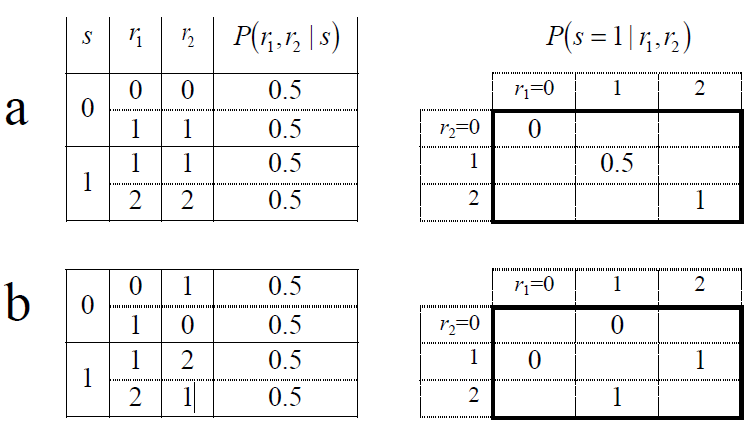

**Meister & Hosoya**

To answer whether correlations between neurons contain useful information for neural coding, the metric used to address this question should convey what information correlations carry *above and beyond* only the firing rate. Meister and Hosoya critique Niderman et al.'s (2001) information measure for not conveying the information difference between scheme a and b (Figure 1): although the loss of information $\Delta I$ is 0 for both, scheme b conveys twice as much information as scheme a about which stimulus was presented (because $P(s = 1|r_1, r_2)$ for scheme b can determine with certainty the stimulus of two responses whereas $P(s = 1|r_1, r_2)$ for scheme a can only determine the stimulus with certainty for *one* response). As explained in Nirenberg et al.'s response, Meister and Hosoya misunderstand that $\Delta I$ is not used to compare different coding schemes, but instead to compare the information given by independent and correlated distributions for the *same* coding scheme. In fact, for both coding schemes, $\Delta I = 0$ because the correlations do not further help in decoding the stimulus that was presented. 

Meister and Hosoya thus seem to misunderstand the goal of the information measure Nirenberg et al. are using: As they are investigating the (relative) importance of correlations for neural decoding, $\Delta I$ is not intended to convey the amount of information $I$, but the importance of *correlations* for coding.

However, Meister and Hosoya rightfully point out that one of the desiderata of an information metric would be to allow for a comparison between different coding schemes or different neuronal populations; to assess the contribution of correlations to stimulus decoding for one cell pair *relative* to another. Although spike correlations are to be found all across the brain, whether they contribute any meaning likely differs, and by ranking neuronal populations in terms of the importance of spike correlations, we may find more insight in the processes encoded by these neuronal populations. For example, if spike correlations do not contribute encoding information in the visual domain but do so in the auditory domain, what is the utility of these correlations in the visual domain? Are they reflective of another process?

The information measure $\Delta I$ used by Nirenberg et al. (2001) does allow for such a relative comparison, as not only can we compare $\Delta I$ (and with that the contribution of spike correlations for decoding) of different neuronal populations, how they report the measure themselves ($1 - \frac{\Delta I}{I}$) ensures that the measure is not biased towards pairs with high information (by dividing by total $I$).

As a last remark on Niderman et al. (2001), in their commentary, Berry and Schneidman are clever to remark that "this decoder still requires simultaneously recoded spike train inputs $p(r_1, r_2)$ in order to predict the stimulus without additional error" (p.2), meaning that although Nirenberg et al. (2001) claim that their findings of the lack of importance of correlations imply that this would greatly simplify our analysis, we would still have to measure activity from all neurons even if they act as independent encoders.

Of course, if these correlations do not provide information for decoding stimuli, it remains the question what they could be used for - for instance, Nirenberg and Latham (2003) offer the suggestion that they could increase the probability for postsynaptic neurons to fire (p. 7353). A potentially interesting and more invasive question to investigate would be how neurons would respond when fed uncorrelated spikes as compared to correlated spikes, and whether this would lead to any different output behaviour.
<!-- 
comment that their information measure cannot tell them anything about the contribution of spike correlations for one neuronal pair relative to the contribution of spike correlations of another.

We would like an information criterium that allows us to evaluate how much 

that can compare when there are a different number of neuronal responses possible (3 options in a, 4 options in b)

can compare the delta_i of (a -> r|s - ind) to (b) -->

# Problem 2

In [ ]:
# @title Dependencies
import matplotlib.pyplot as plt
import numpy as np
import math
import sympy as sm
import scipy
import random
 cmap = ['red', 'darkred', 'dodgerblue', 'lightblue', 'olive', 'gold', 'silver']

# Problem 2.

*a) Implement the SOM algorithm for a 1-dimensional representation and 2-dimensional feature space comprised of a rectangle with sides a and b. r then corresponds to a linear index, say “i”.*



In [ ]:
class SOM():
  '''
  Inputs:
  a, b: sides of rectangle

  input_D: dimensions of input/feature space

  N: number of training samples

  nr_iters: number of iterations

  normalize = whether to normalize the input data/weights EDIT
  '''
  def __init__(self):
    np.random.seed(123) # Ensure reproducibility
    self.nr_iters = nr_iters

    training_samples_x = np.random.uniform(0, a, size = [P]) # x coordinates
    training_samples_y = np.random.uniform(0, b, size = [P]) # y coordinates
    self.training_samples = np.column_stack([training_samples_x, training_samples_y])

    # Randomly initialize weights -> dimensions 1xinput_D, with N nr of vectors in input space
    weights_x = np.random.uniform(0, a, size = [N]) # x coordinates
    weights_y = np.random.uniform(0, b, size = [N]) # y coordinates
    self.weights = np.column_stack([weights_x, weights_y])
    # self.weights = np.random.random_sample(size=(N, input_D))

    # Neighbourhood size sigma
    self.sigma0 = sigma0 # initial neighbourhood radius
    self.sigma_decay_factor = nr_iters / np.log(self.sigma0) # sigma decay parameter

    # Learning rate alpha
    self.alpha0 = alpha0 # initial learning rate
    self.alpha_decay_factor = nr_iters / np.log(self.alpha0) # alpha decay parameter

  # We want to normalize the data, so learning is not biased
  # def normalise(raw):
  #   # normalize by dimension (transpose)
  #   data = raw.copy().T

  #   for dimension in range(data.shape[0]):
  #     # print("max", data[dimension,:].max())
  #     data[dimension,:] = data[dimension,:] / data[dimension,:].max()
    # return data.T

  def update_alpha(self, iter):
    '''
    Update learning rate alpha with exponentially decay
    '''
    # return self.alpha0 * np.exp(-iter / self.nr_iters)
    return self.alpha0 * (1 - iter/self.nr_iters)

  def update_sigma(self, iter):
    '''
    Update neighbourhood size sigma with exponentially decay
    '''
    # return self.sigma0 * np.exp(-iter / self.sigma_decay_factor)
    return self.sigma0 * (1 - iter/self.nr_iters)

  def get_BMU(self, training_sample):
    '''
    Finds best matching unit (BMU) - the neuron closest to the training sample
    '''
    # Get index of weight vector with smallest distance from target vector
    index = np.argmin(np.sum((self.weights - training_sample)**2, axis = 1))
    BMU = {"index": index, "BMU_weight": self.weights[index]}
    # return self.weights[np.argmin(np.sum((self.weights - training_sample)**2, axis = 1))]
    return BMU

  def compute_influence(self, represSpace_weight, r_star, iter):
    '''
    Compute the influence the winning neuron/best matching unit (BMU) for the weight change
    ---
    Inputs: 
    
    r_star: winning neuron

    '''
    distance = np.sqrt(np.sum((r_star["index"] - represSpace_weight)**2))
    # distance = np.sum((r_star - represSpace_weight)**2)
    # print("compute_influence:\n distance {}; (2 * self.update_sigma(iter)**2){}; influence {}".format(distance, (2 * self.update_sigma(iter)**2), np.exp( - (distance**2) / (2 * self.update_sigma(iter)**2) )))
    return np.exp( - (distance**2) / (2 * self.update_sigma(iter)**2) )

  def update_weights(self, training_sample, iter):
    '''
    Function that updates weights according to their distance from the winning neuron.
    If the neurons are not in the neighbourhood, the update will be very small
    (as np.exp(- distance) will be very small).
    '''
    updated_weights = np.copy(self.weights) # copy current weights
    r_star = self.get_BMU(training_sample)
  
    for represSpace_point in range(len(self.weights)): # Update the weights of all points in input space
      distance = np.sqrt(np.sum((r_star["index"] - represSpace_point)**2))
      # If in neighbourhood of r_star:
      if distance < self.update_sigma(iter):
    
        influence = self.compute_influence(represSpace_point, r_star, iter)
        updated_weights[represSpace_point] = self.weights[represSpace_point] + self.update_alpha(iter) * influence * (training_sample - self.weights[represSpace_point])
     
    # Update weights
    self.weights = updated_weights

    return updated_weights


In [ ]:
#@title Set parameters of SOM

a = 1 #@param #Length of triangle {type:"slider", min:0, max:100, step:1}
b = 1 #@param #Height of triangle {type:"slider", min:0, max:100, step:1}
P = 50 #@param #Number of patterns {type:"slider", min:0, max:1000, step:1}
N = 5 #@param #Number of neurons {type:"slider", min:0, max:1000, step:1}
# N = P # could be equal to nr of patterns
input_D = 2 #@param #Input dimensions {type:"slider", min:0, max:5, step:1}
nr_iters = 5001 #@param #Number of iterations {type:"slider", min:0, max:5001, step:1}
alpha0 = 0.5 #@param #Initial learning rate {type:"slider", min:0, max:1, step:1}
# sigma0 = 4 #@param #Initial neighbourhood size {type:"slider", min:0, max:4, step:1}

N_range = [10, 50, 200]
stepsize = 1000
display_iters = np.arange(0, nr_iters, stepsize)


In [ ]:
# Run Self-Organizing Map (SOM):
'''
For each iteration, go through all training samples and update the weights 
accordingly.
'''

results_N_range = {}

for N_value in range(len(N_range)):

  temp = {}
  N = N_range[N_value]
  sigma0 = round(N/3)

  # Create SOM object
  temp["SOM_1"] = SOM()

  # Save weights
  save_weights = {}

  for iter in range(nr_iters): # For a number of iterations
    # print("Iteration nr {}".format(iter))
    
    for sample in range(len(temp["SOM_1"].training_samples)):
      # print("Iteration {}, training pattern nr {}".format(iter, sample))

      # Get training sample
      training_sample = temp["SOM_1"].training_samples[sample]

      # Update weights
      temp["SOM_1"].update_weights(training_sample, iter)
    
      if iter in display_iters:
        save_weights[iter] = temp["SOM_1"].weights
      
      temp["save_weights"] = save_weights

  results_N_range[N_value] = temp

The mean gradient for 10 neurons is 0.015 (last iteration)
The mean gradient for 50 neurons is -0.012 (last iteration)
The mean gradient for 200 neurons is -0.001 (last iteration)


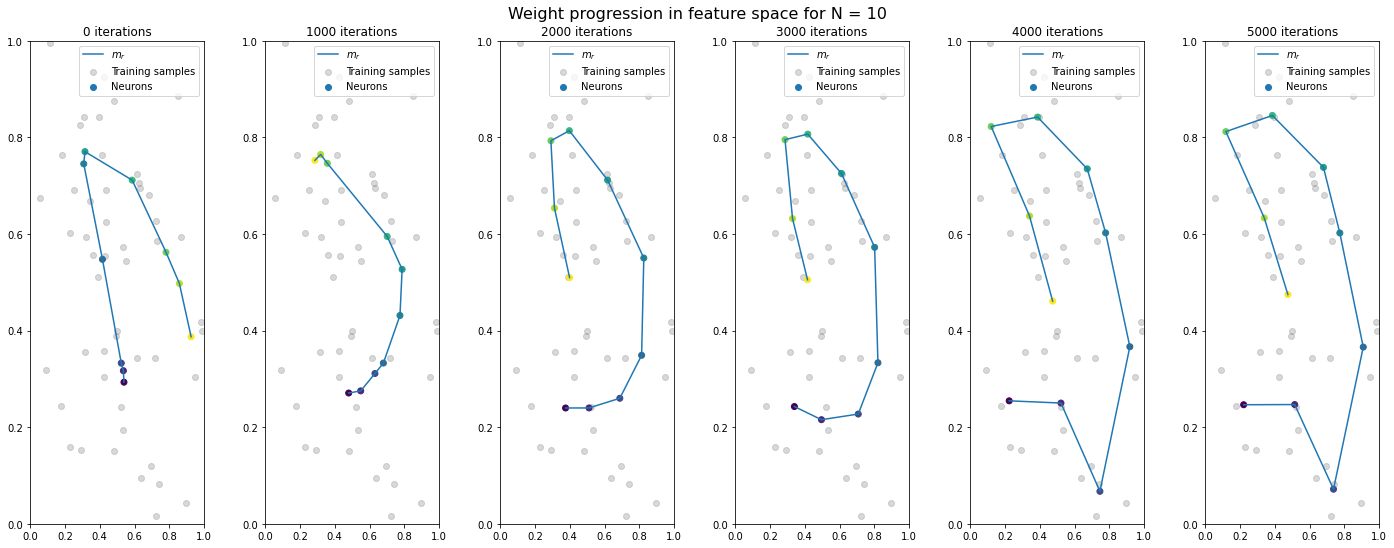

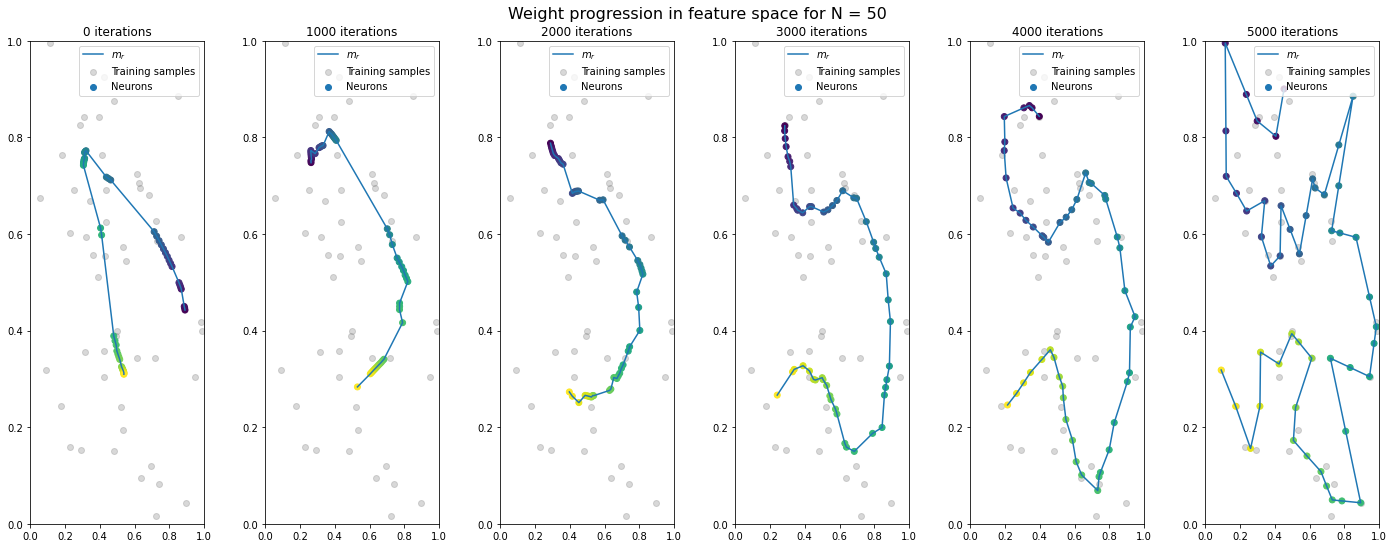

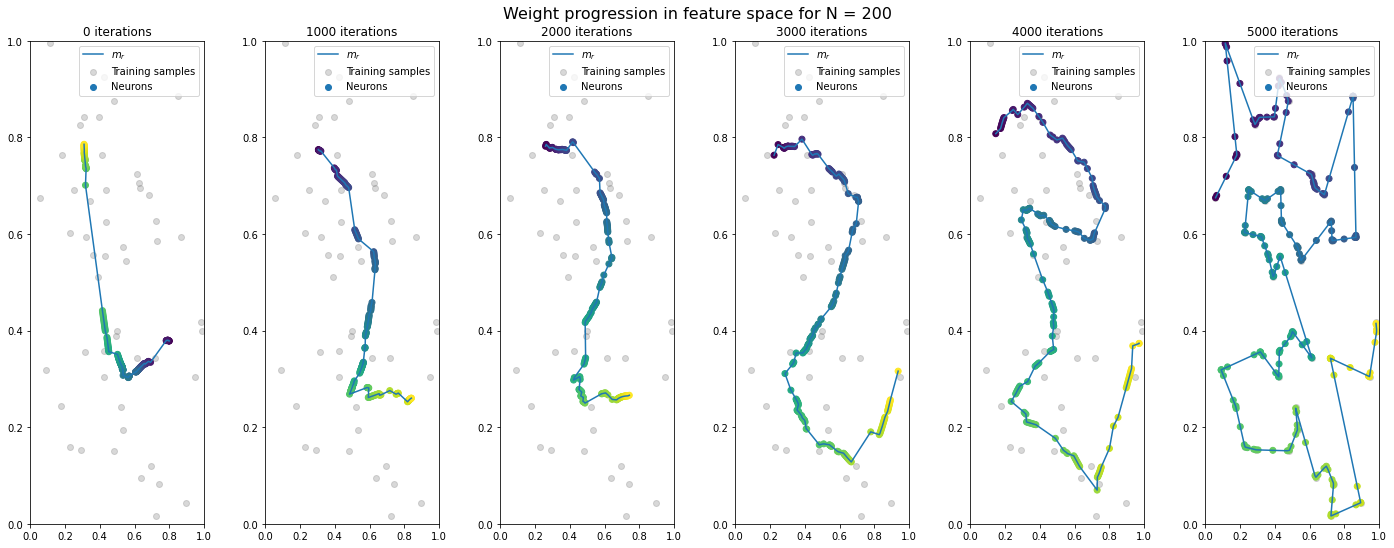

In [ ]:
for N_value in range(len(N_range)):
  # Plot initial state
  fig, (axes) = plt.subplots(1, len(display_iters), figsize=(20,8),sharex = False, sharey = False)
  fontsize = 14
  fig.suptitle("Weight progression in feature space for N = {}".format(N_range[N_value]), fontsize = fontsize+2);

  # Plot training samples
  x_coords_training = [entry[0] for entry in results_N_range[N_value]["SOM_1"].training_samples]
  y_coords_training = [entry[1] for entry in results_N_range[N_value]["SOM_1"].training_samples]
  index = np.arange(len(results_N_range[N_value]["SOM_1"].weights))
  # viridis = cm.get_cmap('viridis', 12)

  for iter in range(len(display_iters)):

    # Plot initial weigths
    x_coords_weights = [entry[0] for entry in results_N_range[N_value]["save_weights"][display_iters[iter]]]
    y_coords_weights = [entry[1] for entry in results_N_range[N_value]["save_weights"][display_iters[iter]]]

    axes[iter].scatter(x_coords_training, y_coords_training, label = "Training samples", alpha = .3, color = 'grey');
    axes[iter].plot(x_coords_weights, y_coords_weights, label = r"$m_r$");
    axes[iter].scatter(x_coords_weights, y_coords_weights, c = index, cmap = 'viridis', label = "Neurons");
    axes[iter].set_title("Weights", fontsize = fontsize);
    axes[iter].set_xlim(0, a);
    axes[iter].set_ylim(0, b);
    axes[iter].set_title("{} iterations".format(display_iters[iter]));
    axes[iter].legend()

  # Compute gradient of last iteration

  grad = np.mean(np.gradient(y_coords_weights, 1)) # Gradient with steps 
  print("The mean gradient for {N} neurons is {grad:.{digits}f} (last iteration)".format(N = N_range[N_value], grad = grad, digits = 3))
  fig.tight_layout(pad=3.0); # Add spacing between subplots


*b) Use this algorithm for a=b=1 and $N=10, 50, 200$. Explore how fast α and σ should decay in time. Comment on the effect of increasing the number of points N in representation space.*


For each iteration, all training patterns were presented sequentially. An exponentially decaying $\alpha$ and $\sigma$ seemed to result in a sufficient coverage of the future space, though many iterations were required before convergence.

Notably, the neighbourhood size has to scale up to the number of neurons used - if not, the neighbourhood will stay too small such that the representation space is slow to organize (neurons in proximity of each other in the representation space will not be neighbours in the feature space). Here, we implemented an initial neighbourhood size of $\frac{N}{3}$ which exponentially decays.

When the number of training patterns equals the number of neurons, $P = N = 50$, we find that each neuron's weight will almost be equal to that of one training pattern, if given a sufficient number of iterations. When $P > N$, meaning each neuron cannot be dedicated to each training pattern, we find that the neurons will find weights that minimize the distance between training patterns as to cover the entire space. In contrast, when $P < N$, neurons will overpopulate the same space.


### 2c.) Repeat for a=1, b=4

In [ ]:
#@title Set parameters of SOM

a = 1 #@param #Length of triangle {type:"slider", min:0, max:100, step:1}
b = 4 #@param #Height of triangle {type:"slider", min:0, max:100, step:1}
P = 50 #@param #Number of patterns {type:"slider", min:0, max:1000, step:1}
N = 5 #@param #Number of neurons {type:"slider", min:0, max:1000, step:1}
# N = P # could be equal to nr of patterns
input_D = 2 #@param #Input dimensions {type:"slider", min:0, max:5, step:1}
nr_iters = 5001 #@param #Number of iterations {type:"slider", min:0, max:5001, step:1}
alpha0 = 0.5 #@param #Initial learning rate {type:"slider", min:0, max:1, step:1}
# sigma0 = 4#@param #Initial neighbourhood size {type:"slider", min:0, max:4, step:1}
#0.025

N_range = [10, 50, 200]
# N_range = [10]
stepsize = 1000
display_iters = np.arange(0, nr_iters, stepsize)


In [ ]:
# Run Self-Organizing Map (SOM):
'''
For each iteration, go through all training samples and update the weights 
accordingly.
'''

results_N_range = {}

for N_value in range(len(N_range)):

  temp = {}
  N = N_range[N_value]
  sigma0 = round(N/2)
  # C = N # Assign same number of neurons as number of patterns N

  # Create SOM object
  temp["SOM_1"] = SOM()

  # Save weights
  save_weights = {}

  for iter in range(nr_iters): # For a number of iterations
    # print("Iteration nr {}".format(iter))
    
    for sample in range(len(temp["SOM_1"].training_samples)):
      # print("Iteration {}, training pattern nr {}".format(iter, sample))

      # Get training sample
      training_sample = temp["SOM_1"].training_samples[sample]

      # Update weights
      temp["SOM_1"].update_weights(training_sample, iter)
     
      if iter in display_iters:
        save_weights[iter] = temp["SOM_1"].weights
      
      temp["save_weights"] = save_weights

  results_N_range[N_value] = temp

The mean gradient for 10 neurons is -0.381 (last iteration)
The mean gradient for 50 neurons is -0.080 (last iteration)
The mean gradient for 200 neurons is 0.019 (last iteration)


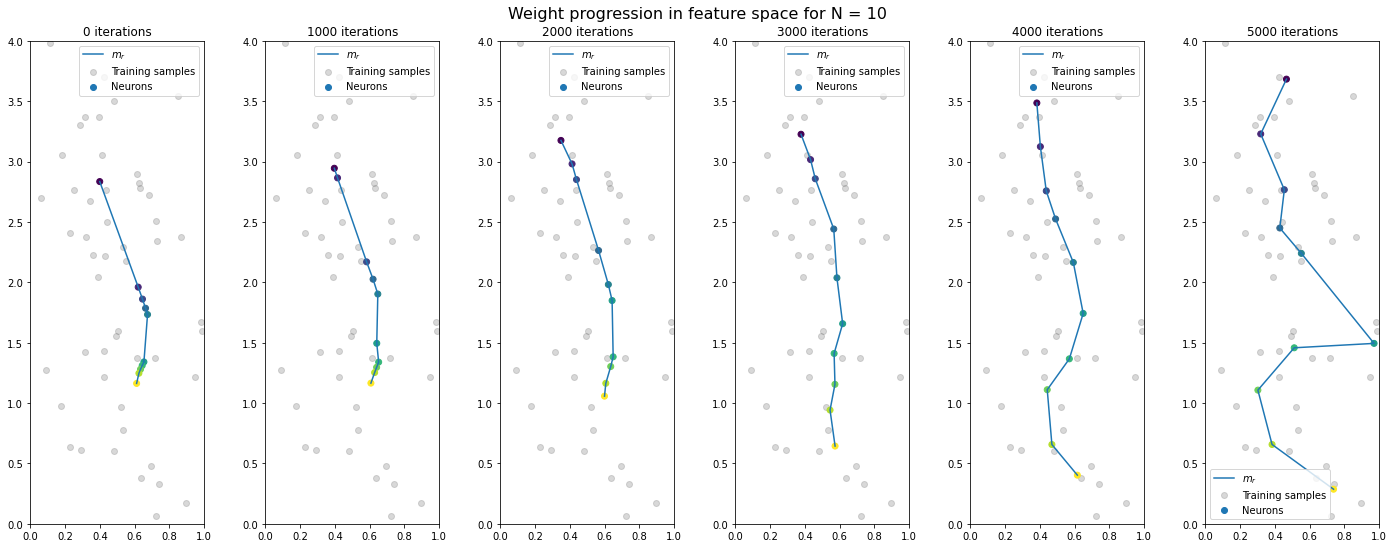

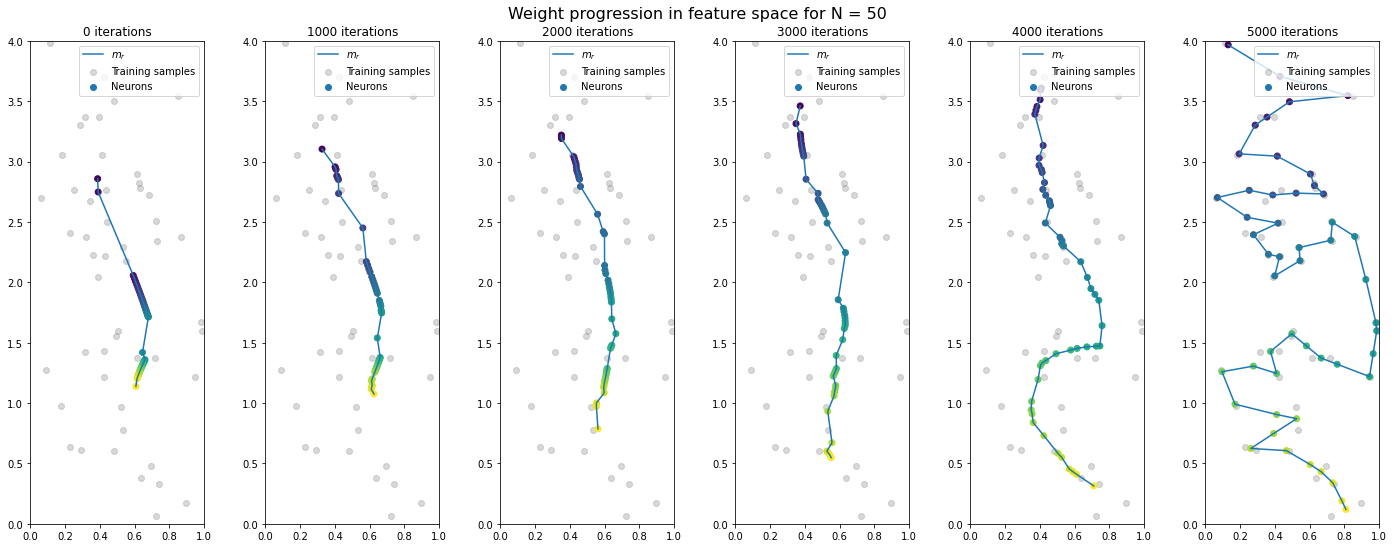

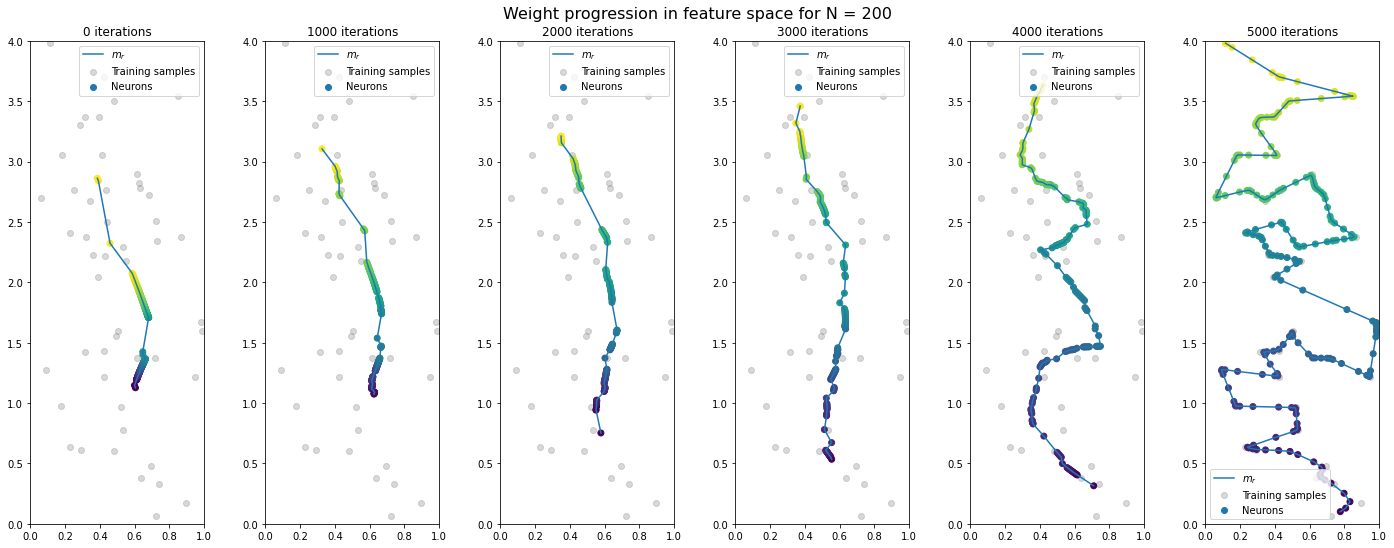

In [ ]:
for N_value in range(len(N_range)):
  # Plot initial state
  fig, (axes) = plt.subplots(1, len(display_iters), figsize=(20,8),sharex = False, sharey = False)
  fontsize = 14
  fig.suptitle("Weight progression in feature space for N = {}".format(N_range[N_value]), fontsize = fontsize+2);

  # Plot training samples
  x_coords_training = [entry[0] for entry in results_N_range[N_value]["SOM_1"].training_samples]
  y_coords_training = [entry[1] for entry in results_N_range[N_value]["SOM_1"].training_samples]
  index = np.arange(len(results_N_range[N_value]["SOM_1"].weights))
  # viridis = cm.get_cmap('viridis', 12)

  for iter in range(len(display_iters)):

    # Plot initial weigths
    x_coords_weights = [entry[0] for entry in results_N_range[N_value]["save_weights"][display_iters[iter]]]
    y_coords_weights = [entry[1] for entry in results_N_range[N_value]["save_weights"][display_iters[iter]]]

    axes[iter].scatter(x_coords_training, y_coords_training, label = "Training samples", alpha = .3, color = 'grey');
    axes[iter].plot(x_coords_weights, y_coords_weights, label = r"$m_r$");
    axes[iter].scatter(x_coords_weights, y_coords_weights, c = index, cmap = 'viridis', label = "Neurons");
    axes[iter].set_title("Weights", fontsize = fontsize);
    axes[iter].set_xlim(0, a);
    axes[iter].set_ylim(0, b);
    axes[iter].set_title("{} iterations".format(display_iters[iter]));
    axes[iter].legend()

  # Compute gradient of last iteration

  grad = np.mean(np.gradient(y_coords_weights, 1)) # Gradient with steps 
  print("The mean gradient for {N} neurons is {grad:.{digits}f} (last iteration)".format(N = N_range[N_value], grad = grad, digits = 3))
  fig.tight_layout(pad=3.0); # Add spacing between subplots

*c) Repeat for a=1, b=4. Comment on the shape of the line in feature space defined by mr, when r goes from the lowest to highest value in representation space.*

*d) The difference between b) and c), is that in c) the “b” direction uses more points in representation space, which can be quantified in terms of the gradient (derivative) of mr (please show this).*

Comparing *2b* to *2c*, we notice that the $m_r$ line in feature space is much steeper in the horizontal direction (side *b* of the rectangle) than in the  vertical direction (side *a* of the rectangle), which makes sense given that there are more values to be represented of side *b* of the rectangle. This is also reflected in the higher mean gradient of *2c* than *2b*: 0.019 compared to 0.001 ($N$ = 200), respectively.

### 2d.) Yu et al. (2005)


*In the Yu et al paper (Neuron, 2005, Vol 47, p 267) the same problem is studied but for 2-dimensional representation space, and 5 or more dimensional feature space. They address the issue that Kohonen maps predict correlations between gradients in feature values, but that these have not been found experimentally so far.*

*1) Describe the three ways in which these correlations are quantified in the paper.*

Correlations between gradient values in feature values were computed for both (a) retinotopic maps and each feature map and (b) *between* feature maps (gradient of orientation, ocular dominance, and spatial frequency).

The three ways in which correlations between gradients in feature values (as predicted by Kohonen maps) are quantified are:

* for each pixel, they calculated the intersection angle between the retinotopic map and a feature map (or the intersection angle between the gradient of two feature maps)

* the pixels were grouped into nine 10° bins based on the intersection angle between the gradient of the retinotopic map and a feature map (or the intersection angle between the gradient of two feature maps). These nine bins were then correlated with one another. Additionally, they also performed the analysis by only considering the pixels for which *both* maps had high gradients (top 30% percentile).

* each pixel was assigned a value between 1 and 10 based on which gradient strength percentile it belonged to. They then selected the pixels from the ocular dominance map whose gradient was in the top or bottom 20th percentile and calculated the average orientation gradient of those pixels, to compare what the average orientation gradient values are in either high or low-gradient ocular dominance regions.

In the simulated model (both for anisotropic and isotropic maps) as well as in experimental observations, a negative correlation was observed, which suggests that the highest gradient regions of two maps avoid one another.


*2) Why is the Ferret cortex useful to address this issue experimentally?*

Ferrets are a good and convenient animal model to study features in visual maps as ferrets are born quite early and only open their eyes at postnatal day 30. This allows for experimental control and a close study of the effect of visual input on still ongoing (brain) development [1]. Moreover, lower-level inputs from primary visual cortex (V1) are transformed in a similar manner in their higher-level visual processing area PSS as in primate higher-level visual processing area MT  [1]. MT integrates local signals from V1 neurons into global signals [1]. Crucially, similar to primates, ferret V1 neurons are also sensitive to orientation, spatial frequency, and ocular dominance. 

*3) What is their explanation for the fact that the correlation in gradients between orientation and ocular dominance is still rather low for the Ferret? How about the lack of correlations found in experiments in other species?*


Yu et al. (2005) did not find a significant tendency for the gradient vectors of the orientation map and those of the ocular dominance map to intersect at near-perpendicular angles (i.e. between 60-90 degrees) - only 36.2% did, which is not significantly above the chance percentage of 33.3% (nor was a significant tendency found between the gradient vectors of the orientation map and those of the spatial frequency map). When binning the pixels into nine 10 degrees bins based on their intersection angle, there was not a great increase of number of pixels in the higher degree bins (which would suggest there were more pixels with a high intersection angle; Figure 7E, red line). However, when considering only the pixels which both had a high gradient (top 30% percentile) in orientation or ocular dominance, there was a clear tendency for orthogonal intersection angles between the gradient vectors of the two maps. 

This indicates that although overall, an anisotropic map (as predicted) decreases the tendency for perpendicular intersections between gradients of orientation and ocular dominance maps, in places of the cortex where maps have  overlapping *high* gradients, the maps *are* strongly orthogonal. In general, orientation and ocular dominance (as well as spatial frequency) are elongated along a parallel axis of the retinotopic map, and are not orthogonal. In other words, two features are only orthogonally mapped in regions where both features have a high-gradient.

Yu et al. (2005) explain this orthogonality only in specific high-gradient regions (and not all over the cortex) in the following way:
to map multiple features in a single 2D cortical region, not all feature maps can be mutually orthogonal. In order to represent multiple maps, only those high-gradient regions of maps will be orthogonal.

They relate their findings to research in cats and macaques: orientation and ocular dominance contours orthogonally intersect at the borders of the ocular dominance map, and the orthogonality of the intersection between these two maps increases in the linear region of the orientation (where orientation preferences change).





*4) Think of issues on which you could criticize this paper.*

Not meant as criticism, but rather a direction for future research: Yu et al. (2005) used adult ferrets, with an already developed visual cortex. However,  would be interesting to see what would happen if a ferret is deprived of one visual feature - what would the Kohonen map predict? If features are presented only incompletely (e.g. only orientations between 0-45°, only one eye), what would happen to the high-gradient orthogonality in the visual map? Moreover, if using still maturing ferrets, the progress and development of visual maps can be tracked and studied. Such data could provide further support for the ordering and convergence phases of the self-organizing map.


# References

[1] Lempel, A. & Nielsen, K. (2019). Ferrets as a Model for Higher-Level Visual Motion Processing. Current Biology, 2(29), p. 179-91.